# Face Generation
In this project, you'll use generative adversarial networks to generate new images of faces.
### Get the Data
You'll be using two datasets in this project:
- MNIST
- CelebA

Since the celebA dataset is complex and you're doing GANs in a project for the first time, we want you to test your neural network on MNIST before CelebA.  Running the GANs on MNIST will allow you to see how well your model trains sooner.

If you're using [FloydHub](https://www.floydhub.com/), set `data_dir` to "/input" and use the [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [1]:
data_dir = '/data'
!pip install matplotlib==2.0.2
# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
#data_dir = '/input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

    100% |████████████████████████████████| 14.6MB 48kB/s  eta 0:00:01   59% |███████████████████▏            | 8.7MB 43.3MB/s eta 0:00:01    74% |████████████████████████        | 10.9MB 37.2MB/s eta 0:00:01
  Found existing installation: matplotlib 2.1.0
    Uninstalling matplotlib-2.1.0:
      Successfully uninstalled matplotlib-2.1.0
You are using pip version 9.0.1, however version 18.0 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
Found mnist Data
Found celeba Data


## Explore the Data
### MNIST
As you're aware, the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. You can view the first number of examples by changing `show_n_images`. 

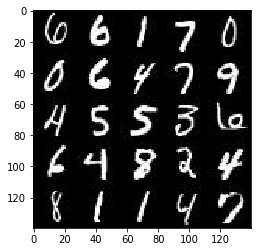

In [2]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

### CelebA
The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations.  Since you're going to be generating faces, you won't need the annotations.  You can view the first number of examples by changing `show_n_images`.

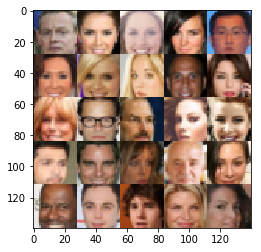

In [3]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## Preprocess the Data
Since the project's main focus is on building the GANs, we'll preprocess the data for you.  The values of the MNIST and CelebA dataset will be in the range of -0.5 to 0.5 of 28x28 dimensional images.  The CelebA images will be cropped to remove parts of the image that don't include a face, then resized down to 28x28.

The MNIST images are black and white images with a single [color channel](https://en.wikipedia.org/wiki/Channel_(digital_image%29) while the CelebA images have [3 color channels (RGB color channel)](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images).
## Build the Neural Network
You'll build the components necessary to build a GANs by implementing the following functions below:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [4]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.3.0
Default GPU Device: /gpu:0


### Input
Implement the `model_inputs` function to create TF Placeholders for the Neural Network. It should create the following placeholders:
- Real input images placeholder with rank 4 using `image_width`, `image_height`, and `image_channels`.
- Z input placeholder with rank 2 using `z_dim`.
- Learning rate placeholder with rank 0.

Return the placeholders in the following the tuple (tensor of real input images, tensor of z data)

In [6]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    # TODO: Implement Function

    image_tensor = tf.placeholder(tf.float32, (None, image_width, image_height, image_channels), name = "image_tensor")
    data_tensor = tf.placeholder(tf.float32, (None, z_dim), name = "data_tensor")
    learning_rate = tf.placeholder(tf.float32, name = "learning_rate")
    
    return image_tensor, data_tensor, learning_rate


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.framework.ops.Operation'>):
<tf.Operation 'assert_rank_2/Assert/Assert' type=Assert>
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
['File "/opt/conda/lib/python3.6/runpy.py", line 193, in _run_module_as_main\n    "__main__", mod_spec)', 'File "/opt/conda/lib/python3.6/runpy.py", line 85, in _run_code\n    exec(code, run_globals)', 'File "/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>\n    app.launch_new_instance()', 'File "/opt/conda/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance\n    app.start()', 'File "/opt/conda/lib/python3.6/site-packages/ipykernel/kernelapp.py", line 478, in start\n    self.io_loop.start()', 'File "/opt/conda/lib/python3.6/site-packages/zmq/eventloop/ioloop.py", line 177, in start\n    super(ZMQIOLoop, self).start()', 'File "/opt/co

### Discriminator
Implement `discriminator` to create a discriminator neural network that discriminates on `images`.  This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "discriminator" to allow the variables to be reused.  The function should return a tuple of (tensor output of the discriminator, tensor logits of the discriminator).

In [7]:
def discriminator(images, reuse=False):
    """
    Create the discriminator network
    :param images: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    # TODO: Implement Function

    alpha = 0.1
    probability = 0.9
    
    with tf.variable_scope("discriminator", reuse = reuse):
        prex1 = tf.layers.conv2d(images, 64, 5, strides = 2, padding = "same", activation = None)
        x1 = tf.maximum(alpha * prex1, prex1)
        
        prex2 = tf.layers.conv2d(x1, 128, 5, strides = 2, padding = "same", activation = None)
        prex2 = tf.layers.batch_normalization(prex2, training = True)
        prex2 = tf.maximum(alpha * prex2, prex2)
        x2 = tf.nn.dropout(prex2, keep_prob = probability)
        
        prex3 = tf.layers.conv2d(x2, 256, 5, strides = 2, padding = "same", activation = None)
        prex3 = tf.layers.batch_normalization(prex3, training = True)
        prex3 = tf.maximum(alpha * prex3, prex3)
        x3 = tf.nn.dropout(prex3, keep_prob = probability)
        
        flatten = tf.reshape(x3, (-1, 4 * 4 * 256))
        tensor_logit = tf.layers.dense(flatten, 1)
        tensor_output = tf.sigmoid(tensor_logit)
        
    return (tensor_output, tensor_logit)


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

Tests Passed


### Generator
Implement `generator` to generate an image using `z`. This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "generator" to allow the variables to be reused. The function should return the generated 28 x 28 x `out_channel_dim` images.

In [8]:
def generator(z, out_channel_dim, is_train=True):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    # TODO: Implement Function
    
    alpha = 0.1
    probability = 0.9
    
    with tf.variable_scope("generator", reuse = not is_train):
        preg1 = tf.layers.dense(z, 7 * 7 * 512)
        preg1 = tf.reshape(preg1, (-1, 7, 7, 512))
        preg1 = tf.layers.batch_normalization(preg1, training = is_train)
        g1 = tf.maximum(alpha * preg1, preg1)
        
        preg2 = tf.layers.conv2d_transpose(g1, 256, 5, strides = 2, padding = "same", activation = None)
        preg2 = tf.layers.batch_normalization(preg2, training = is_train)
        preg2 = tf.maximum(alpha * preg2, preg2)
        g2 = tf.nn.dropout(preg2, keep_prob = probability)
        
        preg3 = tf.layers.conv2d_transpose(g2, 128, 5, strides = 2, padding = "same", activation = None)
        preg3 = tf.layers.batch_normalization(preg3, training = is_train)
        preg3 = tf.maximum(alpha * preg3, preg3)
        g3 = tf.nn.dropout(preg3, keep_prob = probability)
        
        generator_logits = tf.layers.conv2d_transpose(g3, out_channel_dim, 3, strides = 1, padding = "same", activation = None)
        generator_tensor_output = tf.tanh(generator_logits)
    
    return generator_tensor_output


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

Tests Passed


### Loss
Implement `model_loss` to build the GANs for training and calculate the loss.  The function should return a tuple of (discriminator loss, generator loss).  Use the following functions you implemented:
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [9]:
def model_loss(input_real, input_z, out_channel_dim):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    # TODO: Implement Function
    
    g_output = generator(input_z, out_channel_dim)
    real_output, real_logits = discriminator(input_real)
    fake_output, fake_logits = discriminator(g_output, reuse = True)
    
    real_loss = tf.reduce_mean (
        tf.nn.sigmoid_cross_entropy_with_logits (
        logits = real_logits,
        labels = tf.ones_like(real_output) * 0.9
        )
    )
    
    fake_loss = tf.reduce_mean (
        tf.nn.sigmoid_cross_entropy_with_logits (
            logits = fake_logits,
            labels = tf.zeros_like(fake_output)
        )
    )
    
    g_loss = tf.reduce_mean (
        tf.nn.sigmoid_cross_entropy_with_logits (
            logits = fake_logits,
            labels = tf.ones_like(fake_output)
        )
    )
    
    d_loss = real_loss + fake_loss
    
    return d_loss, g_loss


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

Tests Passed


### Optimization
Implement `model_opt` to create the optimization operations for the GANs. Use [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) to get all the trainable variables.  Filter the variables with names that are in the discriminator and generator scope names.  The function should return a tuple of (discriminator training operation, generator training operation).

In [10]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    # TODO: Implement Function
    
    train_var = tf.trainable_variables()
    discriminator_var = [var for var in train_var if var.name.startswith("discriminator")]
    generator_var = [var for var in train_var if var.name.startswith("generator")]
    
    update_ops = tf.get_collection(tf.GraphKeys.UPDATE_OPS)
    
    with tf.control_dependencies(update_ops):
        generator_training = tf.train.AdamOptimizer(learning_rate = learning_rate, beta1 = beta1).minimize(g_loss, var_list = generator_var)
        discriminator_training = tf.train.AdamOptimizer(learning_rate = learning_rate, beta1 = beta1).minimize(d_loss, var_list = discriminator_var)
    return discriminator_training, generator_training


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## Neural Network Training
### Show Output
Use this function to show the current output of the generator during training. It will help you determine how well the GANs is training.

In [11]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### Train
Implement `train` to build and train the GANs.  Use the following functions you implemented:
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

Use the `show_generator_output` to show `generator` output while you train. Running `show_generator_output` for every batch will drastically increase training time and increase the size of the notebook.  It's recommended to print the `generator` output every 100 batches.

In [14]:
def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    # TODO: Build Model
    
    _, image_width, image_height, image_channels = data_shape
    real_input, z_input, l_rate = model_inputs(image_width, image_height, image_channels, z_dim)
    discriminator_loss, generator_loss = model_loss(real_input, z_input, image_channels)
    discriminator_opt, generator_opt = model_opt(discriminator_loss, generator_loss, l_rate, beta1)
    
    saver = tf.train.Saver()
    loss = []
    steps = 0
    total_steps = epoch_count * batch_size
    
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for epoch_i in range(epoch_count):
            for image_b in get_batches(batch_size):
                # TODO: Train Model
                
                steps += 1
                image_b *= 2
                z_b = np.random.uniform(-1, 1, size = (batch_size, z_dim))
                
                _ = sess.run (
                    discriminator_opt, 
                    feed_dict = {real_input: image_b, z_input: z_b, l_rate: learning_rate
                                }
                )
                
                _ = sess.run ( 
                    generator_opt, 
                    feed_dict = {real_input: image_b, z_input: z_b, l_rate: learning_rate
                                }
                )
                
                if steps == 1:
                    print("Initial output:")
                    show_generator_output(sess, 16, z_input, image_channels, data_image_mode)
            
                if steps % 10 == 0:
                    d_train_loss = discriminator_loss.eval({z_input: z_b, real_input: image_b})
                    g_train_loss = generator_loss.eval({z_input: z_b})
                    
                    print("Epoch {}/{}".format(epoch_i + 1, epochs), "Generator Loss: {:.4f}".format(g_train_loss), "Discriminator Loss: {:.4f}".format(d_train_loss))
                    loss.append((d_train_loss, g_train_loss))
                    
                if steps % 100 == 0:
                    show_generator_output(sess, 16, z_input, image_channels, data_image_mode)
                    
        saver.save(sess, "./generator.ckpt")
        
    return loss

### MNIST
Test your GANs architecture on MNIST.  After 2 epochs, the GANs should be able to generate images that look like handwritten digits.  Make sure the loss of the generator is lower than the loss of the discriminator or close to 0.

Initial output:


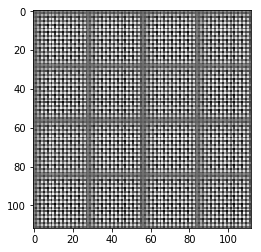

Epoch 1/2 Generator Loss: 4.0419 Discriminator Loss: 0.5832
Epoch 1/2 Generator Loss: 4.7195 Discriminator Loss: 0.4245
Epoch 1/2 Generator Loss: 8.4619 Discriminator Loss: 0.3366
Epoch 1/2 Generator Loss: 2.2449 Discriminator Loss: 0.5226
Epoch 1/2 Generator Loss: 1.8168 Discriminator Loss: 0.9552
Epoch 1/2 Generator Loss: 3.4323 Discriminator Loss: 0.6495
Epoch 1/2 Generator Loss: 6.0810 Discriminator Loss: 0.3699
Epoch 1/2 Generator Loss: 5.6883 Discriminator Loss: 0.3471
Epoch 1/2 Generator Loss: 5.4663 Discriminator Loss: 0.3444
Epoch 1/2 Generator Loss: 4.1329 Discriminator Loss: 0.3531


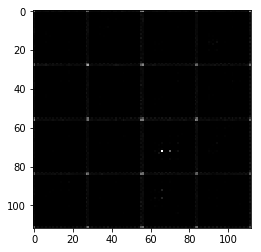

Epoch 1/2 Generator Loss: 2.3804 Discriminator Loss: 0.8865
Epoch 1/2 Generator Loss: 1.5726 Discriminator Loss: 0.9014
Epoch 1/2 Generator Loss: 4.1749 Discriminator Loss: 1.1763
Epoch 1/2 Generator Loss: 0.9570 Discriminator Loss: 1.3550
Epoch 1/2 Generator Loss: 0.7654 Discriminator Loss: 1.6583
Epoch 1/2 Generator Loss: 0.7909 Discriminator Loss: 1.0765
Epoch 1/2 Generator Loss: 3.2918 Discriminator Loss: 1.5920
Epoch 1/2 Generator Loss: 0.2572 Discriminator Loss: 2.2138
Epoch 1/2 Generator Loss: 0.5642 Discriminator Loss: 1.4481
Epoch 1/2 Generator Loss: 0.3498 Discriminator Loss: 1.8286


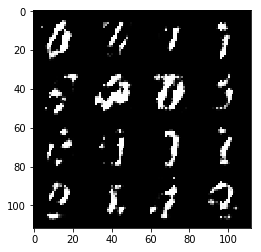

Epoch 1/2 Generator Loss: 1.1403 Discriminator Loss: 0.9191
Epoch 1/2 Generator Loss: 4.1128 Discriminator Loss: 1.9671
Epoch 1/2 Generator Loss: 0.9769 Discriminator Loss: 0.9968
Epoch 1/2 Generator Loss: 2.4799 Discriminator Loss: 1.1917
Epoch 1/2 Generator Loss: 1.6665 Discriminator Loss: 0.7486
Epoch 1/2 Generator Loss: 1.0565 Discriminator Loss: 1.0276
Epoch 1/2 Generator Loss: 2.9352 Discriminator Loss: 1.0869
Epoch 1/2 Generator Loss: 0.6059 Discriminator Loss: 1.3285
Epoch 1/2 Generator Loss: 1.0962 Discriminator Loss: 1.1459
Epoch 1/2 Generator Loss: 1.3532 Discriminator Loss: 1.1779


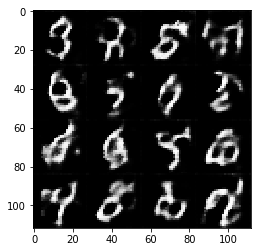

Epoch 1/2 Generator Loss: 1.3780 Discriminator Loss: 1.0645
Epoch 1/2 Generator Loss: 1.9057 Discriminator Loss: 0.9807
Epoch 1/2 Generator Loss: 1.1457 Discriminator Loss: 0.9594
Epoch 1/2 Generator Loss: 0.5196 Discriminator Loss: 1.5132
Epoch 1/2 Generator Loss: 1.7799 Discriminator Loss: 1.2824
Epoch 1/2 Generator Loss: 0.9310 Discriminator Loss: 1.2979
Epoch 1/2 Generator Loss: 1.1326 Discriminator Loss: 0.9628
Epoch 1/2 Generator Loss: 0.4260 Discriminator Loss: 1.5597
Epoch 1/2 Generator Loss: 1.4905 Discriminator Loss: 1.1785
Epoch 1/2 Generator Loss: 1.2723 Discriminator Loss: 1.0660


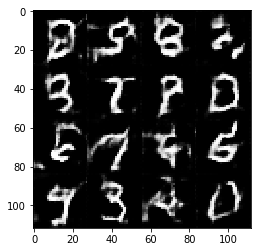

Epoch 1/2 Generator Loss: 2.1056 Discriminator Loss: 1.3289
Epoch 1/2 Generator Loss: 1.0317 Discriminator Loss: 1.0596
Epoch 1/2 Generator Loss: 0.6489 Discriminator Loss: 1.3103
Epoch 1/2 Generator Loss: 1.0072 Discriminator Loss: 1.1546
Epoch 1/2 Generator Loss: 0.9178 Discriminator Loss: 1.1420
Epoch 1/2 Generator Loss: 0.8091 Discriminator Loss: 1.1786
Epoch 2/2 Generator Loss: 1.1277 Discriminator Loss: 0.9904
Epoch 2/2 Generator Loss: 1.4329 Discriminator Loss: 1.1627
Epoch 2/2 Generator Loss: 0.5237 Discriminator Loss: 1.4144
Epoch 2/2 Generator Loss: 0.6654 Discriminator Loss: 1.3335


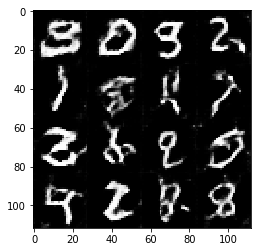

Epoch 2/2 Generator Loss: 1.1008 Discriminator Loss: 1.1065
Epoch 2/2 Generator Loss: 1.1716 Discriminator Loss: 1.0799
Epoch 2/2 Generator Loss: 1.7793 Discriminator Loss: 1.1547
Epoch 2/2 Generator Loss: 1.6145 Discriminator Loss: 1.1642
Epoch 2/2 Generator Loss: 1.7153 Discriminator Loss: 1.1697
Epoch 2/2 Generator Loss: 0.8965 Discriminator Loss: 1.1139
Epoch 2/2 Generator Loss: 0.4894 Discriminator Loss: 1.6239
Epoch 2/2 Generator Loss: 1.3012 Discriminator Loss: 1.0602
Epoch 2/2 Generator Loss: 1.3299 Discriminator Loss: 1.0213
Epoch 2/2 Generator Loss: 0.7509 Discriminator Loss: 1.2538


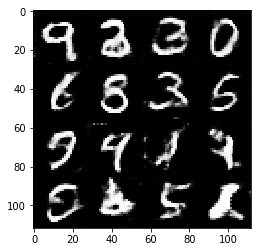

Epoch 2/2 Generator Loss: 0.5719 Discriminator Loss: 1.4467
Epoch 2/2 Generator Loss: 0.7748 Discriminator Loss: 1.1483
Epoch 2/2 Generator Loss: 0.6986 Discriminator Loss: 1.2662
Epoch 2/2 Generator Loss: 1.8933 Discriminator Loss: 1.2852
Epoch 2/2 Generator Loss: 1.1057 Discriminator Loss: 1.0343
Epoch 2/2 Generator Loss: 1.3457 Discriminator Loss: 1.0647
Epoch 2/2 Generator Loss: 0.6724 Discriminator Loss: 1.3939
Epoch 2/2 Generator Loss: 0.5201 Discriminator Loss: 1.4627
Epoch 2/2 Generator Loss: 1.3058 Discriminator Loss: 1.0630
Epoch 2/2 Generator Loss: 0.9537 Discriminator Loss: 1.1917


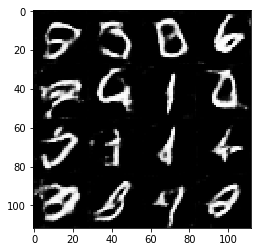

Epoch 2/2 Generator Loss: 1.6550 Discriminator Loss: 1.1637
Epoch 2/2 Generator Loss: 1.6538 Discriminator Loss: 1.2514
Epoch 2/2 Generator Loss: 0.7237 Discriminator Loss: 1.2401
Epoch 2/2 Generator Loss: 0.6851 Discriminator Loss: 1.2863
Epoch 2/2 Generator Loss: 0.9871 Discriminator Loss: 1.1125
Epoch 2/2 Generator Loss: 0.5600 Discriminator Loss: 1.3839
Epoch 2/2 Generator Loss: 1.9694 Discriminator Loss: 1.5140
Epoch 2/2 Generator Loss: 0.8555 Discriminator Loss: 1.1743
Epoch 2/2 Generator Loss: 0.9285 Discriminator Loss: 1.1820
Epoch 2/2 Generator Loss: 1.4852 Discriminator Loss: 1.1131


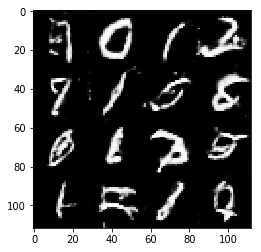

Epoch 2/2 Generator Loss: 1.3505 Discriminator Loss: 1.1677
Epoch 2/2 Generator Loss: 0.8573 Discriminator Loss: 1.2288
Epoch 2/2 Generator Loss: 1.0721 Discriminator Loss: 1.0874
Epoch 2/2 Generator Loss: 0.5717 Discriminator Loss: 1.4524
Epoch 2/2 Generator Loss: 0.7775 Discriminator Loss: 1.3590
Epoch 2/2 Generator Loss: 1.9776 Discriminator Loss: 1.4646
Epoch 2/2 Generator Loss: 0.7053 Discriminator Loss: 1.2560
Epoch 2/2 Generator Loss: 0.6911 Discriminator Loss: 1.3189
Epoch 2/2 Generator Loss: 1.3821 Discriminator Loss: 1.1321
Epoch 2/2 Generator Loss: 1.6456 Discriminator Loss: 1.0667


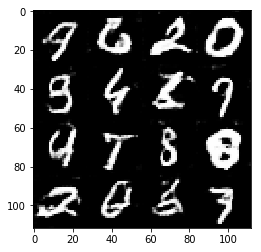

Epoch 2/2 Generator Loss: 0.9556 Discriminator Loss: 1.1608
Epoch 2/2 Generator Loss: 0.8451 Discriminator Loss: 1.2249
Epoch 2/2 Generator Loss: 0.8001 Discriminator Loss: 1.1875


In [15]:
batch_size = 128
z_dim = 100
learning_rate = 0.002
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)

### CelebA
Run your GANs on CelebA.  It will take around 20 minutes on the average GPU to run one epoch.  You can run the whole epoch or stop when it starts to generate realistic faces.

Initial output:


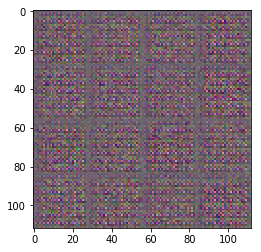

Epoch 1/1 Generator Loss: 1.8306 Discriminator Loss: 0.8125
Epoch 1/1 Generator Loss: 0.2772 Discriminator Loss: 2.3802
Epoch 1/1 Generator Loss: 4.2670 Discriminator Loss: 1.4731
Epoch 1/1 Generator Loss: 3.3805 Discriminator Loss: 1.1652
Epoch 1/1 Generator Loss: 1.5133 Discriminator Loss: 0.9327
Epoch 1/1 Generator Loss: 0.6586 Discriminator Loss: 1.2256
Epoch 1/1 Generator Loss: 1.2357 Discriminator Loss: 0.8956
Epoch 1/1 Generator Loss: 4.2975 Discriminator Loss: 0.6798
Epoch 1/1 Generator Loss: 1.8182 Discriminator Loss: 0.6628
Epoch 1/1 Generator Loss: 0.5430 Discriminator Loss: 1.3676


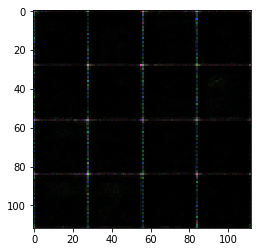

Epoch 1/1 Generator Loss: 4.2664 Discriminator Loss: 0.8190
Epoch 1/1 Generator Loss: 1.5938 Discriminator Loss: 0.6924
Epoch 1/1 Generator Loss: 0.4814 Discriminator Loss: 1.5450
Epoch 1/1 Generator Loss: 1.6974 Discriminator Loss: 0.7065
Epoch 1/1 Generator Loss: 0.2602 Discriminator Loss: 2.0306
Epoch 1/1 Generator Loss: 1.3168 Discriminator Loss: 0.8124
Epoch 1/1 Generator Loss: 1.6446 Discriminator Loss: 0.7174
Epoch 1/1 Generator Loss: 0.6794 Discriminator Loss: 1.2570
Epoch 1/1 Generator Loss: 1.0209 Discriminator Loss: 0.8726
Epoch 1/1 Generator Loss: 0.9412 Discriminator Loss: 0.9428


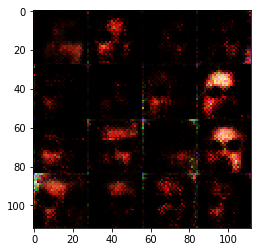

Epoch 1/1 Generator Loss: 0.9954 Discriminator Loss: 0.9079
Epoch 1/1 Generator Loss: 0.7668 Discriminator Loss: 1.0886
Epoch 1/1 Generator Loss: 1.4067 Discriminator Loss: 0.7755
Epoch 1/1 Generator Loss: 0.6323 Discriminator Loss: 1.4142
Epoch 1/1 Generator Loss: 0.7822 Discriminator Loss: 1.1605
Epoch 1/1 Generator Loss: 1.3153 Discriminator Loss: 0.7676
Epoch 1/1 Generator Loss: 0.4762 Discriminator Loss: 1.6694
Epoch 1/1 Generator Loss: 1.9350 Discriminator Loss: 0.8510
Epoch 1/1 Generator Loss: 4.4482 Discriminator Loss: 2.4444
Epoch 1/1 Generator Loss: 1.1551 Discriminator Loss: 0.9514


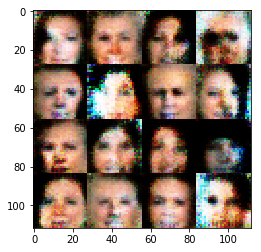

Epoch 1/1 Generator Loss: 0.9650 Discriminator Loss: 0.9924
Epoch 1/1 Generator Loss: 0.4462 Discriminator Loss: 1.5044
Epoch 1/1 Generator Loss: 1.4192 Discriminator Loss: 0.7011
Epoch 1/1 Generator Loss: 4.5088 Discriminator Loss: 2.6597
Epoch 1/1 Generator Loss: 1.1308 Discriminator Loss: 0.8726
Epoch 1/1 Generator Loss: 2.6113 Discriminator Loss: 0.5628
Epoch 1/1 Generator Loss: 2.4349 Discriminator Loss: 0.8694
Epoch 1/1 Generator Loss: 0.9751 Discriminator Loss: 0.8757
Epoch 1/1 Generator Loss: 0.3669 Discriminator Loss: 1.6776
Epoch 1/1 Generator Loss: 2.7700 Discriminator Loss: 1.4478


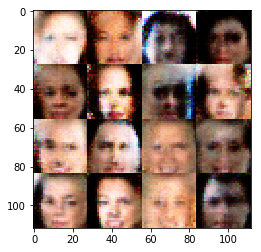

Epoch 1/1 Generator Loss: 2.1602 Discriminator Loss: 0.8380
Epoch 1/1 Generator Loss: 1.6775 Discriminator Loss: 0.7215
Epoch 1/1 Generator Loss: 2.5442 Discriminator Loss: 1.0864
Epoch 1/1 Generator Loss: 2.4937 Discriminator Loss: 1.0420
Epoch 1/1 Generator Loss: 0.2998 Discriminator Loss: 1.9841
Epoch 1/1 Generator Loss: 1.8270 Discriminator Loss: 0.9247
Epoch 1/1 Generator Loss: 2.2851 Discriminator Loss: 1.1786
Epoch 1/1 Generator Loss: 2.4783 Discriminator Loss: 1.2308
Epoch 1/1 Generator Loss: 1.8914 Discriminator Loss: 0.8248
Epoch 1/1 Generator Loss: 0.2919 Discriminator Loss: 1.8562


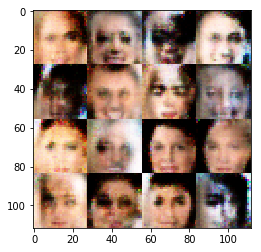

Epoch 1/1 Generator Loss: 1.1216 Discriminator Loss: 0.8743
Epoch 1/1 Generator Loss: 0.3518 Discriminator Loss: 1.6576
Epoch 1/1 Generator Loss: 0.6560 Discriminator Loss: 1.1225
Epoch 1/1 Generator Loss: 1.4581 Discriminator Loss: 0.8785
Epoch 1/1 Generator Loss: 1.7355 Discriminator Loss: 0.8032
Epoch 1/1 Generator Loss: 3.0568 Discriminator Loss: 1.0853
Epoch 1/1 Generator Loss: 0.5871 Discriminator Loss: 1.3454
Epoch 1/1 Generator Loss: 0.6656 Discriminator Loss: 1.2134
Epoch 1/1 Generator Loss: 2.0145 Discriminator Loss: 0.9698
Epoch 1/1 Generator Loss: 0.4676 Discriminator Loss: 1.5407


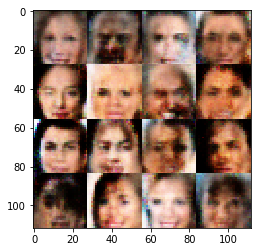

Epoch 1/1 Generator Loss: 0.7730 Discriminator Loss: 1.0834
Epoch 1/1 Generator Loss: 1.6003 Discriminator Loss: 0.9157
Epoch 1/1 Generator Loss: 1.6605 Discriminator Loss: 1.0221
Epoch 1/1 Generator Loss: 1.8161 Discriminator Loss: 1.3940
Epoch 1/1 Generator Loss: 1.8864 Discriminator Loss: 0.7997
Epoch 1/1 Generator Loss: 1.0911 Discriminator Loss: 0.9046
Epoch 1/1 Generator Loss: 1.4628 Discriminator Loss: 0.9950
Epoch 1/1 Generator Loss: 0.9351 Discriminator Loss: 1.1535
Epoch 1/1 Generator Loss: 1.4388 Discriminator Loss: 0.8861
Epoch 1/1 Generator Loss: 0.9445 Discriminator Loss: 1.0516


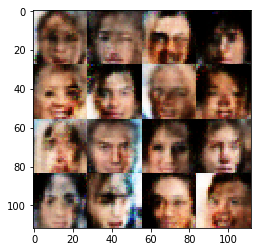

Epoch 1/1 Generator Loss: 0.6209 Discriminator Loss: 1.2954
Epoch 1/1 Generator Loss: 0.7639 Discriminator Loss: 1.0504
Epoch 1/1 Generator Loss: 0.3763 Discriminator Loss: 1.6181
Epoch 1/1 Generator Loss: 0.3134 Discriminator Loss: 1.8461
Epoch 1/1 Generator Loss: 0.5680 Discriminator Loss: 1.2900
Epoch 1/1 Generator Loss: 0.2730 Discriminator Loss: 1.8547
Epoch 1/1 Generator Loss: 1.2651 Discriminator Loss: 0.9016
Epoch 1/1 Generator Loss: 2.1762 Discriminator Loss: 1.0449
Epoch 1/1 Generator Loss: 1.9945 Discriminator Loss: 1.2312
Epoch 1/1 Generator Loss: 1.4735 Discriminator Loss: 1.3717


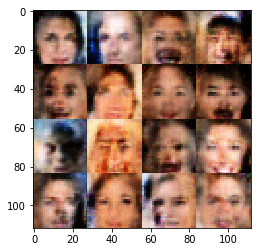

Epoch 1/1 Generator Loss: 1.3591 Discriminator Loss: 1.0484
Epoch 1/1 Generator Loss: 1.2503 Discriminator Loss: 1.0842
Epoch 1/1 Generator Loss: 2.1862 Discriminator Loss: 1.2225
Epoch 1/1 Generator Loss: 0.9529 Discriminator Loss: 0.9389
Epoch 1/1 Generator Loss: 1.5759 Discriminator Loss: 0.8894
Epoch 1/1 Generator Loss: 2.2081 Discriminator Loss: 1.9978
Epoch 1/1 Generator Loss: 1.9488 Discriminator Loss: 0.9997
Epoch 1/1 Generator Loss: 1.7826 Discriminator Loss: 1.2356
Epoch 1/1 Generator Loss: 2.5621 Discriminator Loss: 1.4677
Epoch 1/1 Generator Loss: 0.9513 Discriminator Loss: 1.0249


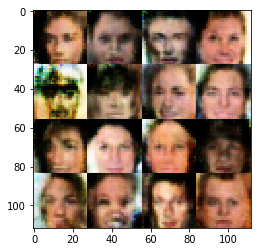

Epoch 1/1 Generator Loss: 0.4270 Discriminator Loss: 1.4343
Epoch 1/1 Generator Loss: 0.8987 Discriminator Loss: 0.9982
Epoch 1/1 Generator Loss: 1.4204 Discriminator Loss: 1.0026
Epoch 1/1 Generator Loss: 0.8849 Discriminator Loss: 1.1258
Epoch 1/1 Generator Loss: 0.4573 Discriminator Loss: 1.4543
Epoch 1/1 Generator Loss: 0.4556 Discriminator Loss: 1.5747
Epoch 1/1 Generator Loss: 0.7932 Discriminator Loss: 1.0963
Epoch 1/1 Generator Loss: 0.9218 Discriminator Loss: 0.9337
Epoch 1/1 Generator Loss: 0.3335 Discriminator Loss: 1.6814
Epoch 1/1 Generator Loss: 0.5623 Discriminator Loss: 1.3664


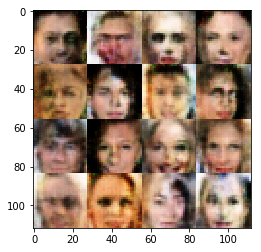

Epoch 1/1 Generator Loss: 0.5295 Discriminator Loss: 1.3634
Epoch 1/1 Generator Loss: 0.5218 Discriminator Loss: 1.3509
Epoch 1/1 Generator Loss: 1.2261 Discriminator Loss: 1.0244
Epoch 1/1 Generator Loss: 0.9486 Discriminator Loss: 1.1656
Epoch 1/1 Generator Loss: 0.4566 Discriminator Loss: 1.4833
Epoch 1/1 Generator Loss: 1.0807 Discriminator Loss: 1.0249
Epoch 1/1 Generator Loss: 1.6551 Discriminator Loss: 0.9967
Epoch 1/1 Generator Loss: 0.5982 Discriminator Loss: 1.2864
Epoch 1/1 Generator Loss: 1.3403 Discriminator Loss: 0.9096
Epoch 1/1 Generator Loss: 0.2898 Discriminator Loss: 1.8109


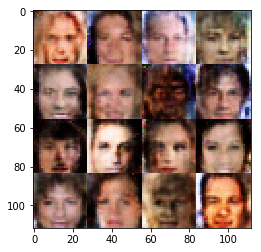

Epoch 1/1 Generator Loss: 1.5970 Discriminator Loss: 1.1078
Epoch 1/1 Generator Loss: 0.3846 Discriminator Loss: 1.6132
Epoch 1/1 Generator Loss: 1.2563 Discriminator Loss: 1.1064
Epoch 1/1 Generator Loss: 0.8831 Discriminator Loss: 1.1962
Epoch 1/1 Generator Loss: 0.9309 Discriminator Loss: 1.1163
Epoch 1/1 Generator Loss: 1.5312 Discriminator Loss: 1.0667
Epoch 1/1 Generator Loss: 0.8430 Discriminator Loss: 1.4140
Epoch 1/1 Generator Loss: 1.7052 Discriminator Loss: 1.5253
Epoch 1/1 Generator Loss: 0.9451 Discriminator Loss: 1.2022
Epoch 1/1 Generator Loss: 0.6499 Discriminator Loss: 1.2803


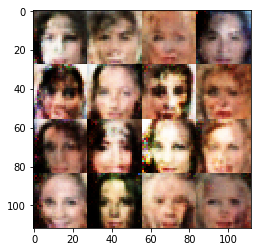

Epoch 1/1 Generator Loss: 0.5314 Discriminator Loss: 1.4031
Epoch 1/1 Generator Loss: 0.8001 Discriminator Loss: 1.0999
Epoch 1/1 Generator Loss: 0.8351 Discriminator Loss: 1.2861
Epoch 1/1 Generator Loss: 1.1159 Discriminator Loss: 1.0160
Epoch 1/1 Generator Loss: 0.3770 Discriminator Loss: 1.6419
Epoch 1/1 Generator Loss: 1.2316 Discriminator Loss: 1.0693
Epoch 1/1 Generator Loss: 0.8759 Discriminator Loss: 1.3155
Epoch 1/1 Generator Loss: 1.0563 Discriminator Loss: 1.2668
Epoch 1/1 Generator Loss: 0.5718 Discriminator Loss: 1.4215
Epoch 1/1 Generator Loss: 1.0034 Discriminator Loss: 1.0058


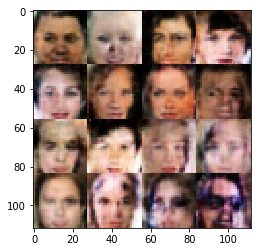

Epoch 1/1 Generator Loss: 0.3836 Discriminator Loss: 1.5734
Epoch 1/1 Generator Loss: 1.6966 Discriminator Loss: 1.1328
Epoch 1/1 Generator Loss: 0.7797 Discriminator Loss: 1.4336
Epoch 1/1 Generator Loss: 2.0114 Discriminator Loss: 1.3094
Epoch 1/1 Generator Loss: 0.8807 Discriminator Loss: 1.1712
Epoch 1/1 Generator Loss: 0.6911 Discriminator Loss: 1.1739
Epoch 1/1 Generator Loss: 0.5436 Discriminator Loss: 1.4119
Epoch 1/1 Generator Loss: 1.4127 Discriminator Loss: 0.9876
Epoch 1/1 Generator Loss: 0.8097 Discriminator Loss: 1.1299
Epoch 1/1 Generator Loss: 0.4306 Discriminator Loss: 1.5317


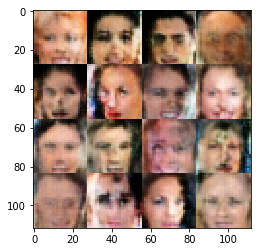

Epoch 1/1 Generator Loss: 0.7961 Discriminator Loss: 1.1976
Epoch 1/1 Generator Loss: 0.5499 Discriminator Loss: 1.3437
Epoch 1/1 Generator Loss: 0.5427 Discriminator Loss: 1.3444
Epoch 1/1 Generator Loss: 0.5759 Discriminator Loss: 1.4394
Epoch 1/1 Generator Loss: 0.5110 Discriminator Loss: 1.3549
Epoch 1/1 Generator Loss: 0.3473 Discriminator Loss: 1.7279
Epoch 1/1 Generator Loss: 0.4742 Discriminator Loss: 1.4042
Epoch 1/1 Generator Loss: 1.0654 Discriminator Loss: 1.1186
Epoch 1/1 Generator Loss: 0.7910 Discriminator Loss: 1.4614
Epoch 1/1 Generator Loss: 1.2420 Discriminator Loss: 1.1235


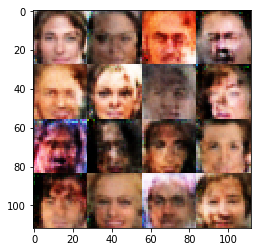

Epoch 1/1 Generator Loss: 0.9924 Discriminator Loss: 1.1904
Epoch 1/1 Generator Loss: 0.6105 Discriminator Loss: 1.3376
Epoch 1/1 Generator Loss: 0.8917 Discriminator Loss: 1.1788
Epoch 1/1 Generator Loss: 0.6929 Discriminator Loss: 1.3924
Epoch 1/1 Generator Loss: 0.6054 Discriminator Loss: 1.2845
Epoch 1/1 Generator Loss: 1.0786 Discriminator Loss: 1.1458
Epoch 1/1 Generator Loss: 0.6839 Discriminator Loss: 1.2408
Epoch 1/1 Generator Loss: 0.7130 Discriminator Loss: 1.3172
Epoch 1/1 Generator Loss: 0.5593 Discriminator Loss: 1.5077
Epoch 1/1 Generator Loss: 0.6169 Discriminator Loss: 1.2333


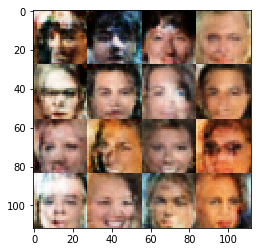

Epoch 1/1 Generator Loss: 0.6503 Discriminator Loss: 1.2869
Epoch 1/1 Generator Loss: 1.1551 Discriminator Loss: 1.1683
Epoch 1/1 Generator Loss: 0.3905 Discriminator Loss: 1.7097
Epoch 1/1 Generator Loss: 0.9368 Discriminator Loss: 1.1261
Epoch 1/1 Generator Loss: 0.8881 Discriminator Loss: 1.2816
Epoch 1/1 Generator Loss: 1.0099 Discriminator Loss: 1.0581
Epoch 1/1 Generator Loss: 0.6474 Discriminator Loss: 1.2688
Epoch 1/1 Generator Loss: 0.9851 Discriminator Loss: 1.1033
Epoch 1/1 Generator Loss: 0.9408 Discriminator Loss: 1.2211
Epoch 1/1 Generator Loss: 0.2381 Discriminator Loss: 2.1191


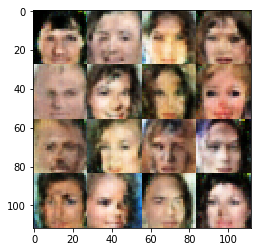

Epoch 1/1 Generator Loss: 0.7728 Discriminator Loss: 1.2830
Epoch 1/1 Generator Loss: 0.6941 Discriminator Loss: 1.3248
Epoch 1/1 Generator Loss: 0.5750 Discriminator Loss: 1.4282
Epoch 1/1 Generator Loss: 0.4445 Discriminator Loss: 1.5070
Epoch 1/1 Generator Loss: 0.5917 Discriminator Loss: 1.3857
Epoch 1/1 Generator Loss: 0.7401 Discriminator Loss: 1.2822
Epoch 1/1 Generator Loss: 1.2550 Discriminator Loss: 1.3232
Epoch 1/1 Generator Loss: 0.7423 Discriminator Loss: 1.2440
Epoch 1/1 Generator Loss: 0.7051 Discriminator Loss: 1.2357
Epoch 1/1 Generator Loss: 0.7459 Discriminator Loss: 1.1895


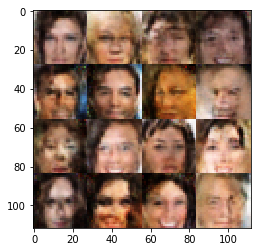

Epoch 1/1 Generator Loss: 1.4147 Discriminator Loss: 1.1527
Epoch 1/1 Generator Loss: 0.9661 Discriminator Loss: 1.2899
Epoch 1/1 Generator Loss: 0.9093 Discriminator Loss: 1.3114
Epoch 1/1 Generator Loss: 0.7717 Discriminator Loss: 1.3398
Epoch 1/1 Generator Loss: 1.1581 Discriminator Loss: 1.2900
Epoch 1/1 Generator Loss: 0.5128 Discriminator Loss: 1.3494
Epoch 1/1 Generator Loss: 1.2538 Discriminator Loss: 1.2433
Epoch 1/1 Generator Loss: 0.9678 Discriminator Loss: 1.0789
Epoch 1/1 Generator Loss: 0.8780 Discriminator Loss: 1.1332
Epoch 1/1 Generator Loss: 0.7074 Discriminator Loss: 1.3353


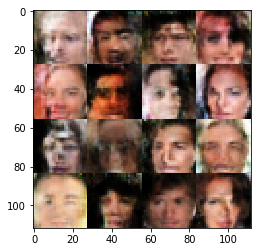

Epoch 1/1 Generator Loss: 0.9026 Discriminator Loss: 1.3131
Epoch 1/1 Generator Loss: 1.0986 Discriminator Loss: 1.3223
Epoch 1/1 Generator Loss: 0.9284 Discriminator Loss: 1.4176
Epoch 1/1 Generator Loss: 0.3284 Discriminator Loss: 1.6585
Epoch 1/1 Generator Loss: 0.9367 Discriminator Loss: 1.2231
Epoch 1/1 Generator Loss: 0.6516 Discriminator Loss: 1.2772
Epoch 1/1 Generator Loss: 0.8563 Discriminator Loss: 1.2429
Epoch 1/1 Generator Loss: 0.7009 Discriminator Loss: 1.2729
Epoch 1/1 Generator Loss: 1.0497 Discriminator Loss: 1.2301
Epoch 1/1 Generator Loss: 0.7131 Discriminator Loss: 1.3466


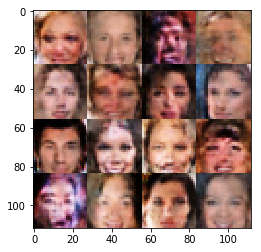

Epoch 1/1 Generator Loss: 0.7421 Discriminator Loss: 1.2195
Epoch 1/1 Generator Loss: 0.8310 Discriminator Loss: 1.1873
Epoch 1/1 Generator Loss: 0.7418 Discriminator Loss: 1.2456
Epoch 1/1 Generator Loss: 0.8946 Discriminator Loss: 1.3377
Epoch 1/1 Generator Loss: 1.4924 Discriminator Loss: 1.5444
Epoch 1/1 Generator Loss: 0.8294 Discriminator Loss: 1.1334
Epoch 1/1 Generator Loss: 1.0112 Discriminator Loss: 1.3028
Epoch 1/1 Generator Loss: 0.5484 Discriminator Loss: 1.3839
Epoch 1/1 Generator Loss: 0.3982 Discriminator Loss: 1.5351
Epoch 1/1 Generator Loss: 0.7555 Discriminator Loss: 1.2639


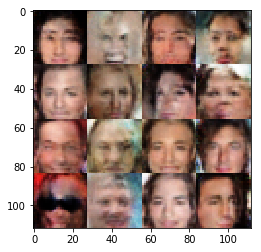

Epoch 1/1 Generator Loss: 1.2060 Discriminator Loss: 1.3493
Epoch 1/1 Generator Loss: 1.1301 Discriminator Loss: 1.1220
Epoch 1/1 Generator Loss: 0.6076 Discriminator Loss: 1.3026
Epoch 1/1 Generator Loss: 0.5023 Discriminator Loss: 1.4769
Epoch 1/1 Generator Loss: 0.7568 Discriminator Loss: 1.3326
Epoch 1/1 Generator Loss: 0.7596 Discriminator Loss: 1.1848
Epoch 1/1 Generator Loss: 1.1884 Discriminator Loss: 1.0916
Epoch 1/1 Generator Loss: 0.8861 Discriminator Loss: 1.5471
Epoch 1/1 Generator Loss: 1.1330 Discriminator Loss: 1.3699
Epoch 1/1 Generator Loss: 0.5203 Discriminator Loss: 1.4419


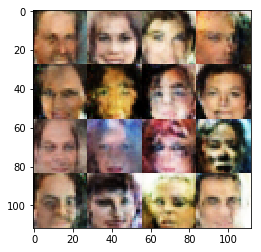

Epoch 1/1 Generator Loss: 0.5139 Discriminator Loss: 1.5308
Epoch 1/1 Generator Loss: 0.7004 Discriminator Loss: 1.3459
Epoch 1/1 Generator Loss: 0.6744 Discriminator Loss: 1.3038
Epoch 1/1 Generator Loss: 0.6811 Discriminator Loss: 1.4095
Epoch 1/1 Generator Loss: 0.6374 Discriminator Loss: 1.4301
Epoch 1/1 Generator Loss: 0.8690 Discriminator Loss: 1.2800
Epoch 1/1 Generator Loss: 0.8684 Discriminator Loss: 1.1790
Epoch 1/1 Generator Loss: 0.6097 Discriminator Loss: 1.3962
Epoch 1/1 Generator Loss: 1.3572 Discriminator Loss: 1.2246
Epoch 1/1 Generator Loss: 0.5210 Discriminator Loss: 1.4007


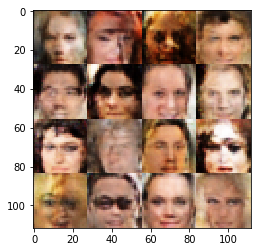

Epoch 1/1 Generator Loss: 0.3257 Discriminator Loss: 1.7062
Epoch 1/1 Generator Loss: 0.9867 Discriminator Loss: 1.1748
Epoch 1/1 Generator Loss: 0.7065 Discriminator Loss: 1.4167
Epoch 1/1 Generator Loss: 0.6225 Discriminator Loss: 1.2518
Epoch 1/1 Generator Loss: 0.9337 Discriminator Loss: 1.1685
Epoch 1/1 Generator Loss: 0.9832 Discriminator Loss: 1.2188
Epoch 1/1 Generator Loss: 0.8718 Discriminator Loss: 1.2643
Epoch 1/1 Generator Loss: 0.7697 Discriminator Loss: 1.2459
Epoch 1/1 Generator Loss: 0.5463 Discriminator Loss: 1.5127
Epoch 1/1 Generator Loss: 0.6916 Discriminator Loss: 1.2724


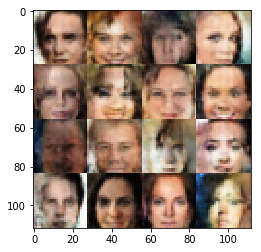

Epoch 1/1 Generator Loss: 0.6216 Discriminator Loss: 1.3280
Epoch 1/1 Generator Loss: 0.8624 Discriminator Loss: 1.3892
Epoch 1/1 Generator Loss: 1.0019 Discriminator Loss: 1.3030
Epoch 1/1 Generator Loss: 0.8528 Discriminator Loss: 1.2473
Epoch 1/1 Generator Loss: 0.5794 Discriminator Loss: 1.4135
Epoch 1/1 Generator Loss: 0.8475 Discriminator Loss: 1.3525
Epoch 1/1 Generator Loss: 0.5748 Discriminator Loss: 1.4715
Epoch 1/1 Generator Loss: 1.3437 Discriminator Loss: 1.2754
Epoch 1/1 Generator Loss: 1.0926 Discriminator Loss: 1.3087
Epoch 1/1 Generator Loss: 0.7609 Discriminator Loss: 1.3654


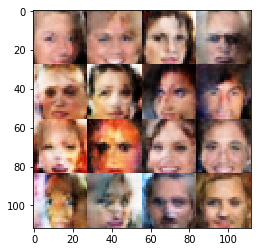

Epoch 1/1 Generator Loss: 0.9899 Discriminator Loss: 1.2988
Epoch 1/1 Generator Loss: 1.0221 Discriminator Loss: 1.4329
Epoch 1/1 Generator Loss: 0.8514 Discriminator Loss: 1.0994
Epoch 1/1 Generator Loss: 1.1458 Discriminator Loss: 1.3284
Epoch 1/1 Generator Loss: 0.6414 Discriminator Loss: 1.3678
Epoch 1/1 Generator Loss: 1.0929 Discriminator Loss: 1.2422
Epoch 1/1 Generator Loss: 0.8238 Discriminator Loss: 1.2797
Epoch 1/1 Generator Loss: 0.6126 Discriminator Loss: 1.3686
Epoch 1/1 Generator Loss: 0.6106 Discriminator Loss: 1.3216
Epoch 1/1 Generator Loss: 0.6573 Discriminator Loss: 1.2659


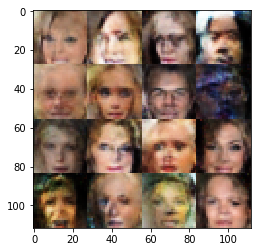

Epoch 1/1 Generator Loss: 0.7544 Discriminator Loss: 1.2658
Epoch 1/1 Generator Loss: 0.7043 Discriminator Loss: 1.2222
Epoch 1/1 Generator Loss: 0.5473 Discriminator Loss: 1.2962
Epoch 1/1 Generator Loss: 0.9582 Discriminator Loss: 1.0348
Epoch 1/1 Generator Loss: 1.1476 Discriminator Loss: 1.0216
Epoch 1/1 Generator Loss: 0.5661 Discriminator Loss: 1.4102
Epoch 1/1 Generator Loss: 0.7364 Discriminator Loss: 1.3614
Epoch 1/1 Generator Loss: 0.6406 Discriminator Loss: 1.3407
Epoch 1/1 Generator Loss: 0.9445 Discriminator Loss: 1.2026
Epoch 1/1 Generator Loss: 0.4324 Discriminator Loss: 1.5539


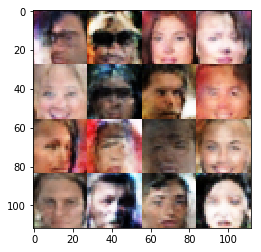

Epoch 1/1 Generator Loss: 0.7538 Discriminator Loss: 1.2875
Epoch 1/1 Generator Loss: 0.5764 Discriminator Loss: 1.4359
Epoch 1/1 Generator Loss: 0.6200 Discriminator Loss: 1.3805
Epoch 1/1 Generator Loss: 0.3754 Discriminator Loss: 1.6928
Epoch 1/1 Generator Loss: 0.6493 Discriminator Loss: 1.4980
Epoch 1/1 Generator Loss: 0.6003 Discriminator Loss: 1.4133
Epoch 1/1 Generator Loss: 0.5391 Discriminator Loss: 1.4077
Epoch 1/1 Generator Loss: 0.7380 Discriminator Loss: 1.2577
Epoch 1/1 Generator Loss: 0.5146 Discriminator Loss: 1.4719
Epoch 1/1 Generator Loss: 0.6349 Discriminator Loss: 1.3900


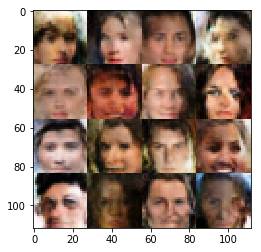

Epoch 1/1 Generator Loss: 0.7754 Discriminator Loss: 1.2621
Epoch 1/1 Generator Loss: 0.7523 Discriminator Loss: 1.1319
Epoch 1/1 Generator Loss: 0.7626 Discriminator Loss: 1.3083
Epoch 1/1 Generator Loss: 0.6868 Discriminator Loss: 1.3571
Epoch 1/1 Generator Loss: 0.3718 Discriminator Loss: 1.8818
Epoch 1/1 Generator Loss: 0.9090 Discriminator Loss: 1.1266
Epoch 1/1 Generator Loss: 1.0855 Discriminator Loss: 1.1369
Epoch 1/1 Generator Loss: 0.8304 Discriminator Loss: 1.1923
Epoch 1/1 Generator Loss: 0.5618 Discriminator Loss: 1.5136
Epoch 1/1 Generator Loss: 0.5988 Discriminator Loss: 1.3248


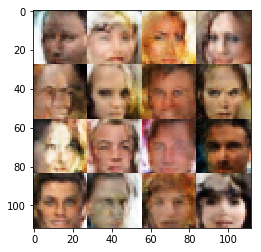

Epoch 1/1 Generator Loss: 2.6497 Discriminator Loss: 2.2976
Epoch 1/1 Generator Loss: 1.0303 Discriminator Loss: 1.2818
Epoch 1/1 Generator Loss: 0.7664 Discriminator Loss: 1.3591
Epoch 1/1 Generator Loss: 0.9342 Discriminator Loss: 1.1073
Epoch 1/1 Generator Loss: 0.5909 Discriminator Loss: 1.3590
Epoch 1/1 Generator Loss: 0.7180 Discriminator Loss: 1.3460
Epoch 1/1 Generator Loss: 0.7576 Discriminator Loss: 1.3144
Epoch 1/1 Generator Loss: 0.6456 Discriminator Loss: 1.2897
Epoch 1/1 Generator Loss: 0.9003 Discriminator Loss: 1.3108
Epoch 1/1 Generator Loss: 0.3330 Discriminator Loss: 1.6727


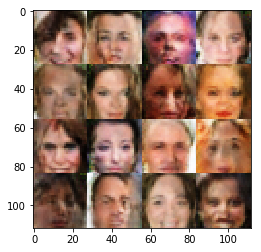

Epoch 1/1 Generator Loss: 0.7954 Discriminator Loss: 1.3226
Epoch 1/1 Generator Loss: 0.5838 Discriminator Loss: 1.3444
Epoch 1/1 Generator Loss: 0.8660 Discriminator Loss: 1.2766
Epoch 1/1 Generator Loss: 0.5362 Discriminator Loss: 1.4186
Epoch 1/1 Generator Loss: 0.4992 Discriminator Loss: 1.6056
Epoch 1/1 Generator Loss: 0.9346 Discriminator Loss: 1.1489
Epoch 1/1 Generator Loss: 0.8962 Discriminator Loss: 1.1500
Epoch 1/1 Generator Loss: 0.6301 Discriminator Loss: 1.4060
Epoch 1/1 Generator Loss: 0.7663 Discriminator Loss: 1.3078
Epoch 1/1 Generator Loss: 0.4703 Discriminator Loss: 1.4721


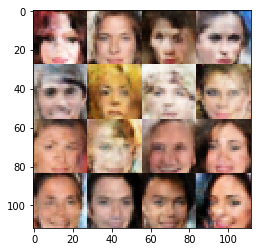

Epoch 1/1 Generator Loss: 1.1180 Discriminator Loss: 1.2962
Epoch 1/1 Generator Loss: 0.8163 Discriminator Loss: 1.2172
Epoch 1/1 Generator Loss: 0.5288 Discriminator Loss: 1.4357
Epoch 1/1 Generator Loss: 0.8402 Discriminator Loss: 1.2434
Epoch 1/1 Generator Loss: 0.7266 Discriminator Loss: 1.3834
Epoch 1/1 Generator Loss: 0.5118 Discriminator Loss: 1.5356


In [16]:
batch_size = 64
z_dim = 100
learning_rate = 0.0002
beta1 = 0.2


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 1

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "helper.py" and "problem_unittests.py" files in your submission.